In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle
import matplotlib
import ipyparams

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

from neurolib_dev_optControl.neurolib.models.aln import ALNModel
from neurolib_dev_optControl.neurolib.utils import plotFunctions as plotFunc
from neurolib_dev_optControl.neurolib.utils import func_optimize as fo
from neurolib_dev_optControl.neurolib.utils import costFunctions as cost
import neurolib_dev_optControl.neurolib.dashboard.functions as functions
import neurolib_dev_optControl.neurolib.dashboard.data as data
import neurolib_dev_optControl.neurolib.dashboard.layout as layout
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

#path = os.path.join(os.getcwd(), "plots")

cmap_ = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors_rgba()
exc_red = cmap_(3)
inh_blue=cmap_(0)
green = cmap_(2)

<IPython.core.display.Javascript object>

not here


In [2]:
aln = ALNModel()
N = aln.params.N

data.set_parameters(aln)

state_vars = aln.state_vars
init_vars = aln.init_vars

##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]
                    
##############################################################               
def setmaxmincontrol(max_c_c, min_c_c, max_c_r, min_c_r):
    import numpy as np
    
    max_cntrl = np.zeros(( 6 ))
    min_cntrl = np.zeros(( 6 ))
    
    max_cntrl[0] = max_c_c
    min_cntrl[0] = min_c_c
    max_cntrl[1] = max_c_c
    min_cntrl[1] = min_c_c
    max_cntrl[2] = max_c_r
    min_cntrl[2] = min_c_r
    max_cntrl[3] = max_c_r
    min_cntrl[3] = min_c_r
    max_cntrl[4] = max_c_r
    min_cntrl[4] = min_c_r
    max_cntrl[5] = max_c_r
    min_cntrl[5] = min_c_r
            
    return max_cntrl, min_cntrl

In [3]:
savepath = (os.getcwd().split('neurolib')[0] + 'Talks_Conf_Workshops_Schools' + os.sep + '22' + os.sep + 'FRANCE22' + 
     os.sep + 'ENCODS' + os.sep + 'poster' + os.sep + 'images')

exc = 0.5
inh = 0.5

In [4]:
dur_pre = 10
dur_post = 10
dur = 200.
dt = aln.params.dt
T = int(1 + dur / dt)

max_it = 10
init_it = 10
prec_vars = [0,1]
trans_time = 0.8
repeat = 20

n_pre = int(np.around(dur_pre/aln.params.dt + 1.,1))
n_post = int(np.around(dur_post/aln.params.dt + 1.,1))

tol = 1e-32
start_step = 10.
c_scheme = np.zeros(( 1,1 ))
c_scheme[0,0] = 1.
u_mat = np.identity(1)
u_scheme = np.array([[1.]])

maxC = [5., -5., 0.18, 0.]
n_dur = int(np.around(dur/aln.params.dt + 1.,1))
max_cntrl, min_cntrl = setmaxmincontrol(maxC[0], maxC[1], maxC[2], maxC[3])

nb = ipyparams.notebook_name
print('nb = ', nb)

case = str(nb[4])

nb =  DU_M1.ipynb


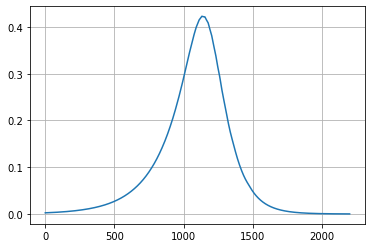

In [15]:
i = 28
t_range=[1500,3701]

noisefree_file = '..' + os.sep + '..' + os.sep + 'data_final_2' + os.sep + 'control_1.pickle'
file = open(noisefree_file, "rb")
noisefree = pickle.load(file)
file.close()
    
c_noisefree = noisefree[0][i][:,:,t_range[0]:t_range[1]]
plt.plot(c_noisefree[0,0,:])
plt.show()

In [6]:
sigma_ou_array = [0.01, 0.05]
noise_realizations_array = [0,20,50]
noise_realizations_final = 10000

In [7]:
n_sig = len(sigma_ou_array)
n_noise = len(noise_realizations_array)

int_t_pen = np.around( (1. - trans_time)*dur/aln.params.dt, 1).astype(int)

cost_final_mean = np.zeros(( n_sig,n_noise ))
target = [None] * n_sig
control_ = [ [None] * n_noise, [None] * n_noise ]
cost_ = control_.copy()
cost_final = control_.copy()

stable_state = np.zeros(( n_noise, 2,2,2, 2))

In [8]:
cost_final_mean = np.zeros(( n_sig,n_noise ))

In [9]:
# get init vars without noise
aln = ALNModel()
data.set_parameters(aln)
aln.params.duration = 3000.

# initial without noise
control0 = aln.getZeroControl()
control0[0,0,:500] = -5.

aln.params.ext_exc_current = exc * 5.
aln.params.ext_inh_current = inh * 5.

aln.run(control=control0)

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]

initVars = init_state_vars

In [10]:
for i_sigma in range(len(sigma_ou_array)):
    
    sigma_ou = sigma_ou_array[i_sigma]
    aln.params.sigma_ou = sigma_ou
    

    aln.params.duration = dur
    control0 = aln.getZeroControl()
    control0[0,0,:500] = 5.

    target_rates_e = []
    target_rates_i = []

    stateswitchcount = 0

    for j in range(noise_realizations_final):
        aln.params.duration = dur
        aln.run(control=control0)
        if np.amin(aln.rates_exc[0,1000:]) < 1.:
            print("fell in down state, repeat")
            j -= 1
            stateswitchcount += 1
            if stateswitchcount > 0.1 * noise_realizations_final:
                break
            continue
        target_rates_e.append(aln.rates_exc[0,1000:])
        target_rates_i.append(aln.rates_inh[0,1000:])

    aln.params.duration = dur
    target[i_sigma] = aln.getZeroTarget()
    target[i_sigma][:,0,:] = np.mean(target_rates_e)
    target[i_sigma][:,1,:] = np.mean(target_rates_i)

    stable_state[i_sigma,1,1,0,0] = target[i_sigma][0,0,-1]
    stable_state[i_sigma,1,1,1,0] = target[i_sigma][0,1,-1]
    stable_state[i_sigma,1,1,0,1] = np.std(target_rates_e)
    stable_state[i_sigma,1,1,1,1] = np.std(target_rates_i)


    aln.params.duration = 300.
    control0 = aln.getZeroControl()
    control0[0,0,:500] = -5.

    target_rates_e = []
    target_rates_i = []

    stateswitchcount = 0

    for j in range(noise_realizations_final):
        aln.params.duration = 300.
        aln.run(control=control0)
        if np.amin(aln.rates_exc[0,1000:]) > 3.:
            print("fell in up state, repeat")
            j -= 1
            stateswitchcount += 1
            if stateswitchcount > 0.1 * noise_realizations_final:
                break
            continue
        target_rates_e.append(aln.rates_exc[0,1000:])
        target_rates_i.append(aln.rates_inh[0,1000:])

    stable_state[i_sigma,1,0,0,0] = np.mean(target_rates_e)
    stable_state[i_sigma,1,0,1,0] = np.mean(target_rates_i)
    stable_state[i_sigma,1,0,0,1] = np.std(target_rates_e)
    stable_state[i_sigma,1,0,1,1] = np.std(target_rates_i)

In [11]:
w_p = np.zeros((2))
for i_sigma in range(len(sigma_ou_array)):
    w_p[i_sigma] = 1. / ( ( stable_state[i_sigma,1,1,0,1] + stable_state[i_sigma,1,1,1,1] ) * (1. - trans_time) * dur )
w_e = 0.
w_s = 1.

aln.params.duration = dur
zero_init = aln.getZeroControl()

In [18]:
max_it = 15
init_it = 3
factor = [1.1, 1.5]

for i_sigma in range(len(sigma_ou_array)):
    
    cost.setParams(w_p[i_sigma], w_e, w_s)
    
    for i_noise in range(len(noise_realizations_array)):
        
        if i_noise in []:
            continue
            
        if i_sigma in [0]:
            continue

        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        aln.params.duration = dur
        
        n_ = 0
        control_sum = np.zeros(( c_noisefree[:,:,:].shape ))
        
        print(noise_realizations)
        
        if i_noise != 0.:
            while n_  < noise_realizations:
                
                print('--------', n_)

                setinit(initVars, aln)

                bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                    zero_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = init_it,
                    tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                    t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                    control_variables_ = [0], prec_variables_ = prec_vars, transition_time_ = trans_time,
                    noise_real=0, init_params = initVars)
                
                if np.isnan(c_[-1]):
                    continue

                max_jump = 0.
                for v_ in range(bestControl.shape[1]):
                    for t_ in range(1, bestControl.shape[2]):
                        diff = np.abs(bestControl[0,v_,t_] - bestControl[0,v_,t_-1])
                        if  diff > max_jump:
                            max_jump = diff

                if max_jump > 0.5:
                    continue

                control_init = bestControl[:,:,100:-100].copy()
                setinit(initVars, aln)
                aln.params.duration = dur

                bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                    control_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = max_it-init_it,
                    tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                    t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                    control_variables_ = [0,1], prec_variables_ = prec_vars, transition_time_ = trans_time,
                    noise_real=0, init_params = initVars)
                
                    
                if np.isnan(c_[-1]):
                    continue

                max_jump = 0.
                for v_ in range(bestControl.shape[1]):
                    for t_ in range(1, bestControl.shape[2]):
                        diff = np.abs(bestControl[0,v_,t_] - bestControl[0,v_,t_-1])
                        if  diff > max_jump:
                            max_jump = diff

                if max_jump > 0.5:
                    continue
                    
                control_sum += bestControl
            
                n_ += 1
    

            control_[i_sigma][i_noise] = control_sum / noise_realizations
        
        else:
            control_[i_sigma][i_noise] = factor[i_sigma] * c_noisefree
        
        aln.params.duration = dur
        setinit(initVars, aln)

        init_control = aln.getZeroControl()           
        init_control[:,:,:] = control_[i_sigma][i_noise][:,:,100:-100]
        T = int(1 + dur/aln.params.dt)
        dt = aln.params.dt

        target_ = target[i_sigma].copy()
        target_[0,0,:int(trans_time * dur / aln.params.dt)] = -1000
        target_[0,1,:int(trans_time * dur / aln.params.dt)] = -1000

        cost_final = 0.
        cs = cost.numba_cost_sparsity_int(1, 6, T, w_s, dt, init_control)

        for n_ in range(noise_realizations_final):
            state_ = fo.updateState(aln, init_control)
            cost_final += cost.numba_cost_precision_int(1,T,dt,w_p[i_sigma],state_, target_, list(prec_vars) )
            

        cost_final_mean[i_sigma, i_noise] = cs + cost_final/noise_realizations_final
        print('mean = ', cost_final_mean[i_sigma, i_noise])

set cost params:  0.026443288126800784 0.0 1.0 0.0
set cost params:  0.005296797491520405 0.0 1.0 0.0
0
mean =  4.6268000654838355
20
-------- 0
interpolate adjoint :  True True True
initial cost =  736.7382214612425
RUN  0 , total integrated cost =  736.7382214612425
Gradient descend method:  None
RUN  1 , total integrated cost =  36.84734873106046
RUN  2 , total integrated cost =  14.14058845867616
RUN  3 , total integrated cost =  5.73539293511067
RUN  3 , total integrated cost =  5.73539293511067
Improved over  3  iterations in  0.127595896992716  seconds by  99.22151548975766  percent.
interpolate adjoint :  True True True
initial cost =  5.481000102038312
RUN  0 , total integrated cost =  5.481000102038312
Gradient descend method:  None
RUN  1 , total integrated cost =  4.901617390739095
RUN  2 , total integrated cost =  5.193418613713856
RUN  3 , total integrated cost =  4.752009922971323
RUN  4 , total integrated cost =  4.84959603715375
RUN  5 , total integrated cost =  4.8299

RUN  7 , total integrated cost =  4.503639899199254
RUN  8 , total integrated cost =  4.184541075046912
RUN  9 , total integrated cost =  4.481578313759779
step size too small or too large
RUN  10 , total integrated cost =  4.138392264769136
RUN  11 , total integrated cost =  4.811598257118815
RUN  12 , total integrated cost =  4.313472067957579
RUN  12 , total integrated cost =  4.313472067957579
Improved over  12  iterations in  1.061001515990938  seconds by  18.859312822857504  percent.
-------- 6
interpolate adjoint :  True True True
initial cost =  709.1141347466051
RUN  0 , total integrated cost =  709.1141347466051
Gradient descend method:  None
RUN  1 , total integrated cost =  25.110210204231702
RUN  2 , total integrated cost =  25.249478746177626
RUN  3 , total integrated cost =  6.68806011034286
RUN  3 , total integrated cost =  6.68806011034286
Improved over  3  iterations in  0.12041393300751224  seconds by  99.05684292801006  percent.
interpolate adjoint :  True True True

step size too small or too large
step size too small or too large
step size too small or too large
RUN  1 , total integrated cost =  39.83395685424077
Control only changes marginally.
RUN  1 , total integrated cost =  39.83395685424077
Improved over  1  iterations in  0.2896859499887796  seconds by  0.0  percent.
-------- 12
interpolate adjoint :  True True True
initial cost =  720.8009632876963
RUN  0 , total integrated cost =  720.8009632876963
Gradient descend method:  None
RUN  1 , total integrated cost =  27.644353383249346
RUN  2 , total integrated cost =  26.470696336866293
RUN  3 , total integrated cost =  15.367740582637982
RUN  3 , total integrated cost =  15.367740582637982
Improved over  3  iterations in  0.12916937399131712  seconds by  97.86796336778698  percent.
interpolate adjoint :  True True True
initial cost =  15.966709743475915
RUN  0 , total integrated cost =  15.966709743475915
Gradient descend method:  None
RUN  1 , total integrated cost =  7.3626570039048715
RU

RUN  5 , total integrated cost =  9.216479631844942
RUN  6 , total integrated cost =  9.249284675145024
RUN  7 , total integrated cost =  9.364174257807948
RUN  8 , total integrated cost =  8.96548368585932
RUN  9 , total integrated cost =  8.966229077623549
RUN  10 , total integrated cost =  9.126369780233786
RUN  11 , total integrated cost =  9.154099477743124
RUN  12 , total integrated cost =  9.107381176088857
RUN  12 , total integrated cost =  9.107381176088857
Improved over  12  iterations in  1.039272316993447  seconds by  56.27382755059192  percent.
-------- 17
interpolate adjoint :  True True True
initial cost =  735.1864479344703
RUN  0 , total integrated cost =  735.1864479344703
Gradient descend method:  None
RUN  1 , total integrated cost =  23.622413598325956
RUN  2 , total integrated cost =  19.404454493957243
RUN  3 , total integrated cost =  21.82221916653949
RUN  3 , total integrated cost =  21.82221916653949
Improved over  3  iterations in  0.12895492599636782  secon

RUN  8 , total integrated cost =  5.961258713182527
RUN  9 , total integrated cost =  5.829872919823177
RUN  10 , total integrated cost =  5.696278503780309
RUN  11 , total integrated cost =  5.678277952608025
RUN  12 , total integrated cost =  5.576814283324437
RUN  12 , total integrated cost =  5.576814283324437
Improved over  12  iterations in  0.9256630909949308  seconds by  73.54095153047578  percent.
-------- 2
interpolate adjoint :  True True True
initial cost =  750.8666649335267
RUN  0 , total integrated cost =  750.8666649335267
Gradient descend method:  None
RUN  1 , total integrated cost =  92.74785825872463
step size too small or too large
RUN  2 , total integrated cost =  60.840206680709336
Control only changes marginally.
RUN  2 , total integrated cost =  60.840206680709336
Improved over  2  iterations in  0.15422017699165735  seconds by  91.89733550282253  percent.
interpolate adjoint :  True True True
initial cost =  149.75288225783206
RUN  0 , total integrated cost = 

RUN  3 , total integrated cost =  4.727346431916613
RUN  4 , total integrated cost =  4.842879978022955
RUN  5 , total integrated cost =  4.655363125064351
RUN  6 , total integrated cost =  4.284427494170168
RUN  7 , total integrated cost =  4.593513696641367
RUN  8 , total integrated cost =  4.567486508367281
RUN  9 , total integrated cost =  4.794160457083114
RUN  10 , total integrated cost =  4.834579490698273
RUN  11 , total integrated cost =  4.706045569385108
RUN  12 , total integrated cost =  5.212868011289103
RUN  12 , total integrated cost =  5.212868011289103
Improved over  12  iterations in  0.9766800659999717  seconds by  23.64076801765269  percent.
-------- 8
interpolate adjoint :  True True True
initial cost =  746.3257135266696
RUN  0 , total integrated cost =  746.3257135266696
Gradient descend method:  None
RUN  1 , total integrated cost =  40.350329143625416
RUN  2 , total integrated cost =  15.872880859484468
RUN  3 , total integrated cost =  8.874872957936324
RUN  3

RUN  1 , total integrated cost =  4.689684134908509
RUN  2 , total integrated cost =  4.358827034102704
RUN  3 , total integrated cost =  4.541106112966923
RUN  4 , total integrated cost =  4.446577461402915
RUN  5 , total integrated cost =  4.571297104206453
RUN  6 , total integrated cost =  4.570338632493105
RUN  7 , total integrated cost =  4.333056299170315
RUN  8 , total integrated cost =  4.5852168341044415
RUN  9 , total integrated cost =  4.8972728415684985
RUN  10 , total integrated cost =  5.2509181633332584
RUN  11 , total integrated cost =  4.732349272942132
RUN  12 , total integrated cost =  4.47351045864429
RUN  12 , total integrated cost =  4.47351045864429
Improved over  12  iterations in  0.9185651699954178  seconds by  29.746324958901724  percent.
-------- 14
interpolate adjoint :  True True True
initial cost =  723.26095383923
RUN  0 , total integrated cost =  723.26095383923
Gradient descend method:  None
RUN  1 , total integrated cost =  25.16640409935884
RUN  2 , 

RUN  8 , total integrated cost =  9.027302803360937
RUN  9 , total integrated cost =  9.334178659202262
RUN  10 , total integrated cost =  9.08048131618987
RUN  11 , total integrated cost =  9.138499630932134
RUN  12 , total integrated cost =  8.59472747147715
RUN  12 , total integrated cost =  8.59472747147715
Improved over  12  iterations in  0.9255685429961886  seconds by  32.925430946980256  percent.
-------- 20
interpolate adjoint :  True True True
initial cost =  714.014803418709
RUN  0 , total integrated cost =  714.014803418709
Gradient descend method:  None
RUN  1 , total integrated cost =  30.450760328505645
RUN  2 , total integrated cost =  19.229527759799907
RUN  3 , total integrated cost =  15.711447394929738
RUN  3 , total integrated cost =  15.711447394929738
Improved over  3  iterations in  0.11711907599237747  seconds by  97.79956279341783  percent.
interpolate adjoint :  True True True
initial cost =  17.492499722219257
RUN  0 , total integrated cost =  17.49249972221

RUN  3 , total integrated cost =  4.445035790156003
RUN  4 , total integrated cost =  6.421208023170998
RUN  5 , total integrated cost =  4.977944764369903
RUN  6 , total integrated cost =  4.492180639926416
RUN  7 , total integrated cost =  4.612531790044113
RUN  8 , total integrated cost =  4.532937460464192
RUN  9 , total integrated cost =  4.489797543412191
RUN  10 , total integrated cost =  4.578421022711904
RUN  11 , total integrated cost =  4.5918747351132065
RUN  12 , total integrated cost =  4.475069041689147
RUN  12 , total integrated cost =  4.475069041689147
Improved over  12  iterations in  0.9665545190073317  seconds by  94.96509984632203  percent.
-------- 26
interpolate adjoint :  True True True
initial cost =  734.8961888011469
RUN  0 , total integrated cost =  734.8961888011469
Gradient descend method:  None
RUN  1 , total integrated cost =  16.655879490109673
RUN  2 , total integrated cost =  13.111754909759856
RUN  3 , total integrated cost =  12.01410598835705
RUN 

RUN  3 , total integrated cost =  7.101204429351315
RUN  4 , total integrated cost =  6.753469025598847
RUN  5 , total integrated cost =  6.742290313713279
RUN  6 , total integrated cost =  6.55460598369918
RUN  7 , total integrated cost =  6.52637131792418
RUN  8 , total integrated cost =  6.424676908589081
RUN  9 , total integrated cost =  6.404587699569593
RUN  10 , total integrated cost =  6.32705049126318
RUN  11 , total integrated cost =  6.429297432143714
RUN  12 , total integrated cost =  6.43347076103192
RUN  12 , total integrated cost =  6.43347076103192
Improved over  12  iterations in  0.9133512999978848  seconds by  42.793463221644366  percent.
-------- 32
interpolate adjoint :  True True True
initial cost =  740.1482086967438
RUN  0 , total integrated cost =  740.1482086967438
Gradient descend method:  None
RUN  1 , total integrated cost =  38.26208111783161
RUN  2 , total integrated cost =  21.55828261608295
RUN  3 , total integrated cost =  27.627427344218074
RUN  3 , t

RUN  3 , total integrated cost =  40.67266379694388
RUN  3 , total integrated cost =  40.67266379694388
Improved over  3  iterations in  0.18511130100523587  seconds by  94.59056680413975  percent.
-------- 38
interpolate adjoint :  True True True
initial cost =  743.7614522883919
RUN  0 , total integrated cost =  743.7614522883919
Gradient descend method:  None
RUN  1 , total integrated cost =  47.96549634825553
RUN  2 , total integrated cost =  11.279848636451687
RUN  3 , total integrated cost =  6.218631508996102
RUN  3 , total integrated cost =  6.218631508996102
Improved over  3  iterations in  0.12228802200115751  seconds by  99.16389435216591  percent.
interpolate adjoint :  True True True
initial cost =  6.600896656903695
RUN  0 , total integrated cost =  6.600896656903695
Gradient descend method:  None
RUN  1 , total integrated cost =  6.217768925224897
RUN  2 , total integrated cost =  6.189070806501149
RUN  3 , total integrated cost =  6.142827581743911
RUN  4 , total integr

RUN  7 , total integrated cost =  8.005690049218275
RUN  8 , total integrated cost =  8.284294405395027
RUN  9 , total integrated cost =  8.052277601451168
RUN  10 , total integrated cost =  8.00078454623971
RUN  11 , total integrated cost =  7.782755429221766
RUN  12 , total integrated cost =  7.598814310311714
RUN  12 , total integrated cost =  7.598814310311714
Improved over  12  iterations in  1.0496134940040065  seconds by  54.820312981103314  percent.
-------- 44
interpolate adjoint :  True True True
initial cost =  738.925859375985
RUN  0 , total integrated cost =  738.925859375985
Gradient descend method:  None
RUN  1 , total integrated cost =  47.998638377994155
RUN  2 , total integrated cost =  14.785285986404539
RUN  3 , total integrated cost =  8.292201963463873
RUN  3 , total integrated cost =  8.292201963463873
Improved over  3  iterations in  0.12038352400122676  seconds by  98.8778032520791  percent.
interpolate adjoint :  True True True
initial cost =  8.95814777117929

RUN  5 , total integrated cost =  4.661482402592694
RUN  6 , total integrated cost =  4.4585403656048515
RUN  7 , total integrated cost =  4.641568488314254
RUN  8 , total integrated cost =  4.697846710679422
RUN  9 , total integrated cost =  4.400669569901819
RUN  10 , total integrated cost =  4.557437378468884
step size too small or too large
RUN  11 , total integrated cost =  4.505032706414748
RUN  12 , total integrated cost =  4.806083647793472
RUN  12 , total integrated cost =  4.806083647793472
Improved over  12  iterations in  1.8235465579928132  seconds by  -4.247992642480483  percent.
-------- 49
interpolate adjoint :  True True True
initial cost =  741.2051711224735
RUN  0 , total integrated cost =  741.2051711224735
Gradient descend method:  None
RUN  1 , total integrated cost =  42.73439984154208
RUN  2 , total integrated cost =  34.677148546835724
RUN  3 , total integrated cost =  12.059863526251963
RUN  3 , total integrated cost =  12.059863526251963
Improved over  3  ite

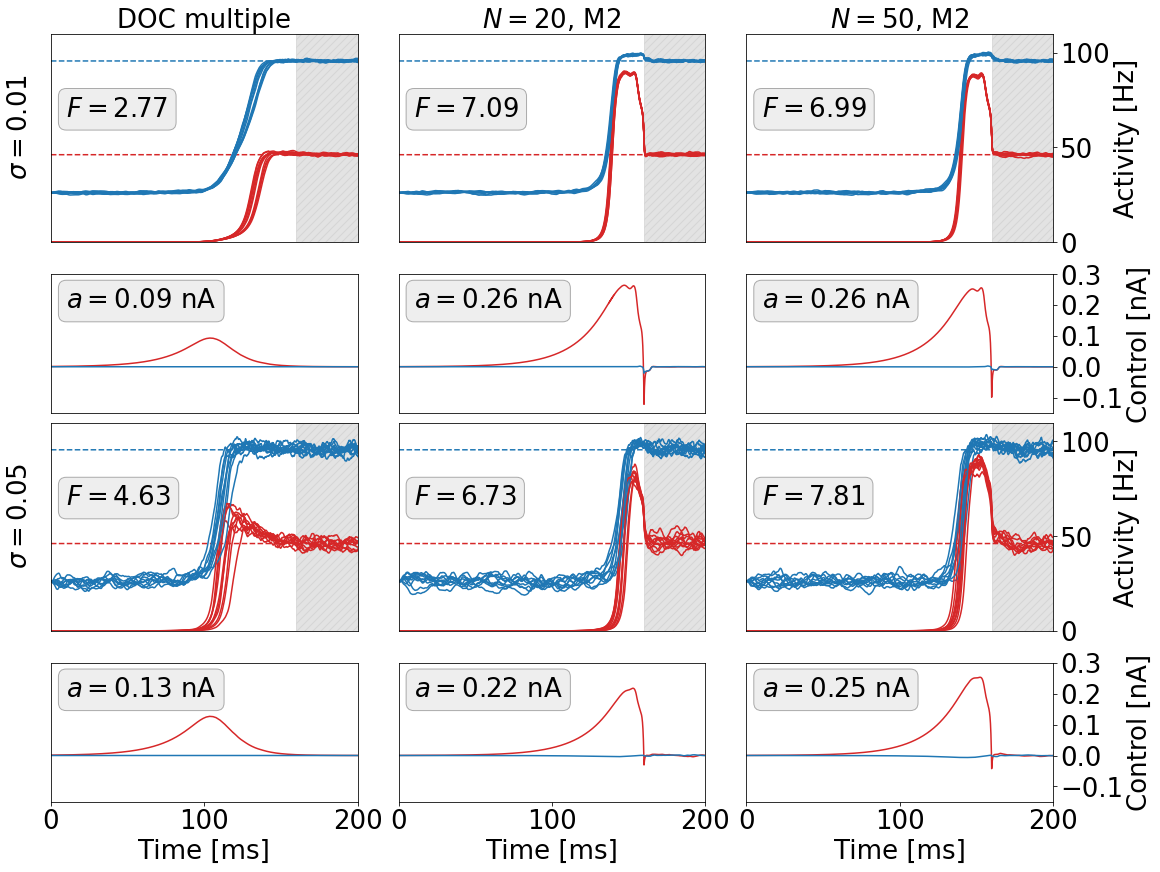

In [27]:
fs_ = 26
fig, ax = plt.subplots(4, 3, figsize=(16,12), constrained_layout=True, facecolor='white',
                       gridspec_kw={'height_ratios': [3,2,3,2]})
#fig.suptitle('Point b', fontsize=fs_)
plot_realizations = 10
i = 50

t_array = np.arange(0,dur+aln.params.dt,aln.params.dt)
ax[0,0].set_title('DOC multiple', fontsize=fs_)

setinit(initVars, aln)
aln.params.duration = dur
target_ = aln.getZeroTarget()

for i_sigma in range(2):
    
    target_[0,0,:] = target[i_sigma][0,0,-1]
    target_[0,1,:] = target[i_sigma][0,1,-1]
    
    for i_noise in range(3):
        
        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        if i_noise != 0:
            ax[0,i_noise].set_title(r'$N=$' + '{}'.format(noise_realizations) + ', M2', fontsize=fs_)

        ax[2*i_sigma+1,i_noise].plot( t_array, control_[i_sigma][i_noise][0,0,100:-100]/5., color=exc_red)
        ax[2*i_sigma+1,i_noise].plot( t_array, control_[i_sigma][i_noise][0,1,100:-100]/5., color=inh_blue)
        
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,0,:], linestyle='--', color=exc_red)
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,1,:], linestyle='--', color=inh_blue)

        for indexx in range(plot_realizations):
            aln.run(control=control_[i_sigma][i_noise][:,:,100:-100])
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_exc[0,:], color=exc_red)
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_inh[0,:], color=inh_blue)

        ax[2*i_sigma,i_noise].text(0.05, 0.7, r'$F = $' + '{:.2f}'.format(cost_final_mean[i_sigma, i_noise]),
                horizontalalignment='left', verticalalignment='top', transform=ax[2*i_sigma,i_noise].transAxes,
                bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)
        
        ax[2*i_sigma+1,i_noise].text(0.05, 0.9, r'$a = $' + '{:.2f} nA'.format(
            max( np.amax(np.abs(control_[i_sigma][i_noise][0,0,100:-100]/5.)),
               np.amax(np.abs(control_[i_sigma][i_noise][0,1,100:-100]/5.))) ),
            horizontalalignment='left', verticalalignment='top', transform=ax[2*i_sigma+1,i_noise].transAxes,
            bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)

for j in range(4):
    for k in range(3):
        ax[j,k].tick_params(axis='x', labelsize=fs_)
        ax[j,k].tick_params(axis='y', labelsize=fs_)
        ax[j,k].set_xlim(0,dur)
        ax[j,k].grid(False)
        if j != 3:
            ax[j,k].set_xticks([])
        else:
            ax[j,k].set_xlabel('Time [ms]', fontsize=fs_)
        ax[j,k].set_yticks([])
        if j%2 == 0:
            ax[j,k].set_ylim(0,110)
            sigma_ou = sigma_ou_array[int(j/2)]
            ax[j,k].axvspan( dur*trans_time, dur, facecolor=midgrey,
                            alpha=0.5, zorder=-1, hatch='///', edgecolor = midgrey)
        elif j%2 == 1:
            ax[j,k].set_ylim(-0.15,0.3)
            
    if j%2 == 0:
        ax[j,-1].set_yticks(np.arange(0,110,50))
        ax[j,-1].set_ylabel('Activity [Hz]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()
        ax[j,0].text(-0.1,0.3, r'$\sigma=$'+'{:.2f}'.format(sigma_ou_array[int(j/2)]), rotation=90, size=fs_,
                 verticalalignment='bottom', horizontalalignment='center', transform=ax[j,0].transAxes)
    
    elif j%2 == 1:     
        ax[j,-1].set_yticks(np.arange(-0.1,0.31,0.1))
        ax[j,-1].set_ylabel('Control [nA]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()

filename_ = nb[:-6] + '.png'
    
fig.savefig(filename_)
fig.savefig(os.path.join(savepath, filename_))
plt.show()

In [23]:
control_1 = [ [None] * n_noise, [None] * n_noise]

In [30]:
for i_sigma in range(2):
    
    cost.setParams(w_p[i_sigma], w_e, w_s)
    
    for i_noise in [1,2]:
        
        if i_sigma in [0]:
            continue
            
        if i_noise in [1]:
            continue

        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        print(noise_realizations)
            
        n_ = 0
        control_sum = np.zeros(( c_noisefree[:,:,:].shape ))
        aln.params.duration = dur
        control_init = aln.getZeroControl()    

        while n_ < noise_realizations:

            print('--------', n_)
            aln.params.duration = dur

            setinit(initVars, aln)
            c_vars = [0]

            bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                control_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = init_it,
                tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                control_variables_ = c_vars, prec_variables_ = prec_vars, transition_time_ = trans_time,
                noise_real=0, init_params = initVars)

            if np.isnan(c_).any():
                continue

            control_init = bestControl[:,:,100:-100].copy()
            c_vars = [0,1]

            bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                control_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = max_it-init_it,
                tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                control_variables_ = c_vars, prec_variables_ = prec_vars, transition_time_ = trans_time,
                noise_real=0, init_params = initVars)

            if np.isnan(c_).any():
                continue

            control_sum += bestControl
            n_ += 1

        control_1[i_sigma][i_noise] = control_sum / noise_realizations

set cost params:  0.026443288126800784 0.0 1.0 0.0
set cost params:  0.005296797491520405 0.0 1.0 0.0
50
-------- 0
interpolate adjoint :  True True True
initial cost =  749.3335383138887
RUN  0 , total integrated cost =  749.3335383138887
Gradient descend method:  None
RUN  1 , total integrated cost =  33.51404763744997
RUN  2 , total integrated cost =  16.355244608230283
RUN  3 , total integrated cost =  13.238609314708887
RUN  3 , total integrated cost =  13.238609314708887
Improved over  3  iterations in  0.3449413069902221  seconds by  98.23328215836999  percent.
interpolate adjoint :  True True True
initial cost =  17.25930278216501
RUN  0 , total integrated cost =  17.25930278216501
Gradient descend method:  None
RUN  1 , total integrated cost =  4.562643099505577
RUN  2 , total integrated cost =  4.218129926384294
RUN  3 , total integrated cost =  4.044265421212055
RUN  4 , total integrated cost =  4.289511591291912
RUN  5 , total integrated cost =  3.9300483968674262
RUN  6 , 

RUN  10 , total integrated cost =  4.156931502386771
RUN  11 , total integrated cost =  4.259429741408283
RUN  12 , total integrated cost =  4.276710181461513
RUN  12 , total integrated cost =  4.276710181461513
Improved over  12  iterations in  0.8932582889974583  seconds by  11.820908227060386  percent.
-------- 6
interpolate adjoint :  True True True
initial cost =  4.782022891430657
RUN  0 , total integrated cost =  4.782022891430657
Gradient descend method:  None
RUN  1 , total integrated cost =  4.532345412692263
step size too small or too large
RUN  2 , total integrated cost =  4.484869979832488
Control only changes marginally.
RUN  2 , total integrated cost =  4.484869979832488
Improved over  2  iterations in  0.19557308200455736  seconds by  6.2139583675072885  percent.
interpolate adjoint :  True True True
initial cost =  5.623638863750996
RUN  0 , total integrated cost =  5.623638863750996
Gradient descend method:  None
RUN  1 , total integrated cost =  4.396266249075691
RUN

step size too small or too large
RUN  5 , total integrated cost =  3.887585296819244
Control only changes marginally.
RUN  5 , total integrated cost =  3.887585296819244
Improved over  5  iterations in  0.5713689760013949  seconds by  28.104044632179168  percent.
-------- 12
interpolate adjoint :  True True True
initial cost =  6.087640194378559
RUN  0 , total integrated cost =  6.087640194378559
Gradient descend method:  None
RUN  1 , total integrated cost =  4.363267675130784
RUN  2 , total integrated cost =  4.263373384222068
RUN  3 , total integrated cost =  4.398383259758461
RUN  3 , total integrated cost =  4.398383259758461
Improved over  3  iterations in  0.13381987600587308  seconds by  27.748961513526865  percent.
interpolate adjoint :  True True True
initial cost =  5.0283928471339765
RUN  0 , total integrated cost =  5.0283928471339765
Gradient descend method:  None
RUN  1 , total integrated cost =  4.093049373968258
RUN  2 , total integrated cost =  4.192419693118839
RUN  

RUN  2 , total integrated cost =  4.963979823855765
RUN  3 , total integrated cost =  5.144077388021019
RUN  3 , total integrated cost =  5.144077388021019
Improved over  3  iterations in  0.11436186799255665  seconds by  10.031302035880927  percent.
interpolate adjoint :  True True True
initial cost =  5.169359193615724
RUN  0 , total integrated cost =  5.169359193615724
Gradient descend method:  None
RUN  1 , total integrated cost =  4.71254514111301
RUN  2 , total integrated cost =  4.779434391545037
RUN  3 , total integrated cost =  4.84063595988616
RUN  4 , total integrated cost =  4.822931068736788
RUN  5 , total integrated cost =  5.062397884813936
RUN  6 , total integrated cost =  4.891635180740349
RUN  7 , total integrated cost =  4.6276115867159255
RUN  8 , total integrated cost =  4.707520445598242
RUN  9 , total integrated cost =  4.668569988390489
RUN  10 , total integrated cost =  4.724499383578172
RUN  11 , total integrated cost =  4.825266753976766
RUN  12 , total integ

RUN  1 , total integrated cost =  4.008557005141217
RUN  2 , total integrated cost =  4.65252773548249
RUN  3 , total integrated cost =  4.573114431339166
RUN  3 , total integrated cost =  4.573114431339166
Improved over  3  iterations in  0.1200036140071461  seconds by  12.77954184997526  percent.
interpolate adjoint :  True True True
initial cost =  4.6936426318042255
RUN  0 , total integrated cost =  4.6936426318042255
Gradient descend method:  None
RUN  1 , total integrated cost =  4.03601684688235
RUN  2 , total integrated cost =  4.526589182869106
RUN  3 , total integrated cost =  4.313402179509183
RUN  4 , total integrated cost =  4.360632258202562
RUN  5 , total integrated cost =  4.163479315312477
RUN  6 , total integrated cost =  4.10331143554539
RUN  7 , total integrated cost =  4.267529598844075
RUN  8 , total integrated cost =  4.193075979719755
RUN  9 , total integrated cost =  4.502272216980411
RUN  10 , total integrated cost =  4.157921276478288
RUN  11 , total integrat

RUN  1 , total integrated cost =  4.685707292139279
RUN  2 , total integrated cost =  4.580796105911446
RUN  3 , total integrated cost =  4.247019275711969
RUN  3 , total integrated cost =  4.247019275711969
Improved over  3  iterations in  0.14101728600508068  seconds by  19.20647105312983  percent.
interpolate adjoint :  True True True
initial cost =  7.747225739070244
RUN  0 , total integrated cost =  7.747225739070244
Gradient descend method:  None
RUN  1 , total integrated cost =  4.620715197506085
RUN  2 , total integrated cost =  4.456813732825632
RUN  3 , total integrated cost =  4.430933259738567
step size too small or too large
RUN  4 , total integrated cost =  4.297116988639349
RUN  5 , total integrated cost =  4.476384974253482
RUN  6 , total integrated cost =  4.349966296344198
RUN  7 , total integrated cost =  4.628311414773044
RUN  8 , total integrated cost =  4.4388975320098245
RUN  9 , total integrated cost =  4.49277944797817
RUN  10 , total integrated cost =  4.56627

RUN  2 , total integrated cost =  5.666830827657019
RUN  3 , total integrated cost =  5.24876662176229
RUN  3 , total integrated cost =  5.24876662176229
Improved over  3  iterations in  0.11859358099172823  seconds by  -3.318219909701071  percent.
interpolate adjoint :  True True True
initial cost =  6.539412680733307
RUN  0 , total integrated cost =  6.539412680733307
Gradient descend method:  None
RUN  1 , total integrated cost =  5.072412956748269
RUN  2 , total integrated cost =  4.8170173141094015
RUN  3 , total integrated cost =  4.724794819136266
RUN  4 , total integrated cost =  4.97335214115016
RUN  5 , total integrated cost =  4.42850429070987
RUN  6 , total integrated cost =  4.660463666662672
RUN  7 , total integrated cost =  4.769102167287604
RUN  8 , total integrated cost =  4.543919391848064
RUN  9 , total integrated cost =  4.5453408004067875
RUN  10 , total integrated cost =  4.517881398174782
RUN  11 , total integrated cost =  4.61844413791766
RUN  12 , total integra

RUN  3 , total integrated cost =  3.7729674997831415
RUN  3 , total integrated cost =  3.7729674997831415
Improved over  3  iterations in  0.12853738199919462  seconds by  28.173011931113862  percent.
interpolate adjoint :  True True True
initial cost =  4.205759420347119
RUN  0 , total integrated cost =  4.205759420347119
Gradient descend method:  None
RUN  1 , total integrated cost =  3.5556286777628006
RUN  2 , total integrated cost =  3.5746036402992183
RUN  3 , total integrated cost =  3.5737332222417537
RUN  4 , total integrated cost =  3.683943722203853
RUN  5 , total integrated cost =  3.670076281187283
RUN  6 , total integrated cost =  3.946970258159342
RUN  7 , total integrated cost =  3.7075309457935797
RUN  8 , total integrated cost =  3.571642997543184
RUN  9 , total integrated cost =  3.4809782081504155
RUN  10 , total integrated cost =  3.4153325572509607
RUN  11 , total integrated cost =  3.395557812080865
RUN  12 , total integrated cost =  3.566733728990312
RUN  12 , t

RUN  1 , total integrated cost =  3.6980199950358643
RUN  2 , total integrated cost =  4.01646625651724
RUN  3 , total integrated cost =  3.6028134514156496
RUN  4 , total integrated cost =  3.7666885845394327
RUN  5 , total integrated cost =  3.7346341214731775
RUN  6 , total integrated cost =  3.7467394508991
RUN  7 , total integrated cost =  3.783538872366125
RUN  8 , total integrated cost =  3.748550881572042
step size too small or too large
step size too small or too large
step size too small or too large
RUN  9 , total integrated cost =  3.748774806989381
Control only changes marginally.
RUN  9 , total integrated cost =  3.748774806989381
Improved over  9  iterations in  0.9449373389943503  seconds by  14.88466336842967  percent.
-------- 49
interpolate adjoint :  True True True
initial cost =  4.166608708056749
RUN  0 , total integrated cost =  4.166608708056749
Gradient descend method:  None
RUN  1 , total integrated cost =  3.800493315957195
RUN  2 , total integrated cost =  4

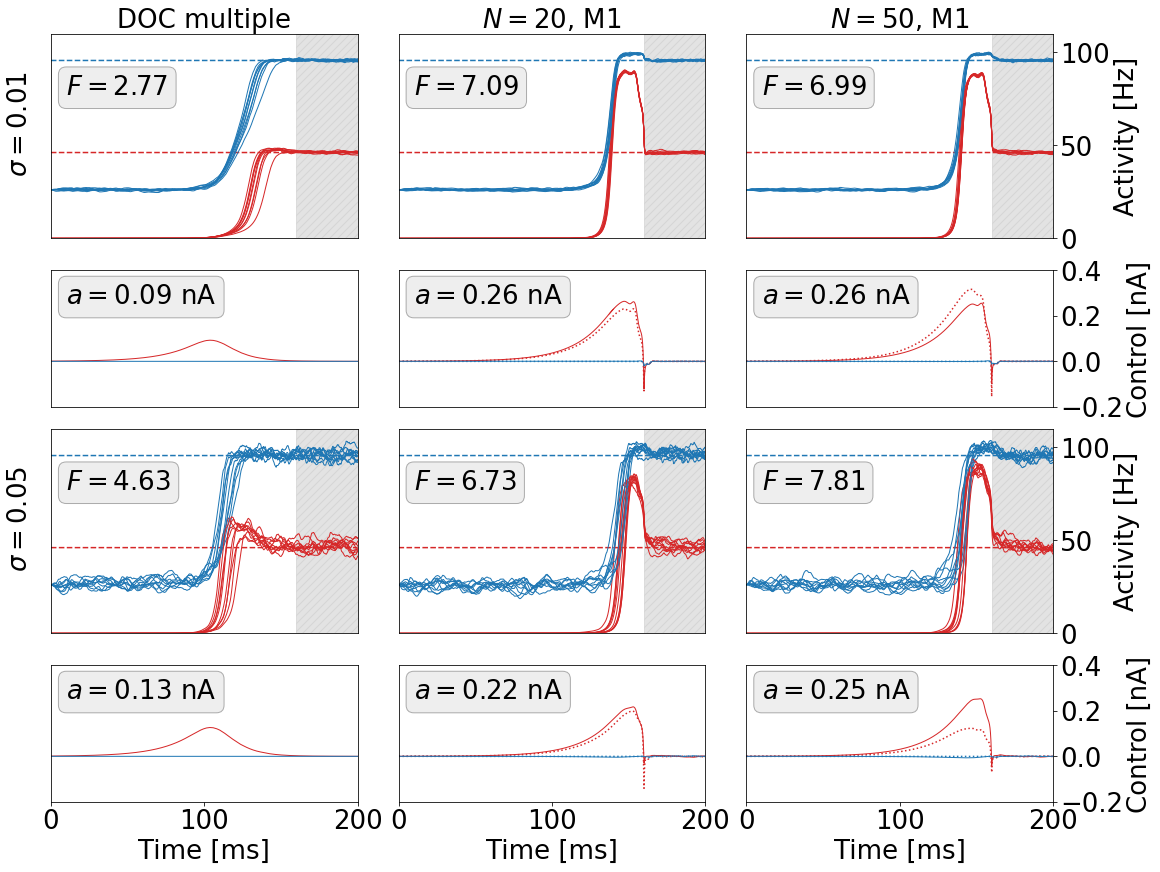

In [32]:
fig, ax = plt.subplots(4, 3, figsize=(16,12), constrained_layout=True, facecolor='white',
                       gridspec_kw={'height_ratios': [3,2,3,2]})

t_array = np.arange(0,dur+aln.params.dt,aln.params.dt)
ax[0,0].set_title('DOC multiple', fontsize=fs_)

setinit(initVars, aln)
aln.params.duration = dur
target_ = aln.getZeroTarget()

for i_sigma in range(2):
    
    target_[0,0,:] = target[i_sigma][0,0,-1]
    target_[0,1,:] = target[i_sigma][0,1,-1]
    
    for i_noise in range(3):
        
        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        if i_noise != 0:
            ax[0,i_noise].set_title(r'$N=$' + '{}'.format(noise_realizations) + ', M1', fontsize=fs_)
            ax[2*i_sigma+1,i_noise].plot( t_array, control_1[i_sigma][i_noise][0,0,100:-100]/5.,
                                         color=exc_red, linestyle='dotted')
            ax[2*i_sigma+1,i_noise].plot( t_array, control_1[i_sigma][i_noise][0,1,100:-100]/5.,
                                         color=inh_blue, linestyle='dotted')

        ax[2*i_sigma+1,i_noise].plot( t_array, control_[i_sigma][i_noise][0,0,100:-100]/5.,
                                     color=exc_red, linewidth=1)
        ax[2*i_sigma+1,i_noise].plot( t_array, control_[i_sigma][i_noise][0,1,100:-100]/5.,
                                     color=inh_blue, linewidth=1)
        
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,0,:], linestyle='--', color=exc_red)
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,1,:], linestyle='--', color=inh_blue)

        for indexx in range(plot_realizations):
            aln.run(control=control_[i_sigma][i_noise][:,:,100:-100])
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_exc[0,:], color=exc_red, linewidth=1)
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_inh[0,:], color=inh_blue, linewidth=1)

        ax[2*i_sigma,i_noise].text(0.05, 0.8, r'$F = $' + '{:.2f}'.format(cost_final_mean[i_sigma, i_noise]),
                horizontalalignment='left', verticalalignment='top', transform=ax[2*i_sigma,i_noise].transAxes,
                bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)
        
        ax[2*i_sigma+1,i_noise].text(0.05, 0.9, r'$a = $' + '{:.2f} nA'.format(
            max( np.amax(np.abs(control_[i_sigma][i_noise][0,0,100:-100]/5.)),
               np.amax(np.abs(control_[i_sigma][i_noise][0,1,100:-100]/5.))) ),
            horizontalalignment='left', verticalalignment='top', transform=ax[2*i_sigma+1,i_noise].transAxes,
            bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)

for j in range(4):
    for k in range(3):
        ax[j,k].tick_params(axis='x', labelsize=fs_)
        ax[j,k].tick_params(axis='y', labelsize=fs_)
        ax[j,k].set_xlim(0,dur)
        ax[j,k].grid(False)
        if j != 3:
            ax[j,k].set_xticks([])
        else:
            ax[j,k].set_xlabel('Time [ms]', fontsize=fs_)
        ax[j,k].set_yticks([])
        if j%2 == 0:
            ax[j,k].set_ylim(0,110)
            sigma_ou = sigma_ou_array[int(j/2)]
            ax[j,k].axvspan( dur*trans_time, dur, facecolor=midgrey,
                            alpha=0.5, zorder=-1, hatch='///', edgecolor = midgrey)
        elif j%2 == 1:
            ax[j,k].set_ylim(-0.2,0.4)
            
    if j%2 == 0:
        ax[j,-1].set_yticks(np.arange(0,110,50))
        ax[j,-1].set_ylabel('Activity [Hz]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()
        ax[j,0].text(-0.1,0.3, r'$\sigma=$'+'{:.2f}'.format(sigma_ou_array[int(j/2)]), rotation=90, size=fs_,
                 verticalalignment='bottom', horizontalalignment='center', transform=ax[j,0].transAxes)
    
    elif j%2 == 1:     
        ax[j,-1].set_yticks(np.arange(-0.2,0.41,0.2))
        ax[j,-1].set_ylabel('Control [nA]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()

nb = ipyparams.notebook_name
filename_ = nb[:-6] + '_1.png'
    
fig.savefig(filename_)
fig.savefig(os.path.join(savepath, filename_))
plt.show()